In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('hanoi_weather_data.csv')  # Replace 'file.csv' with the path to your CSV file
# Display the DataFrame
df  # Use df.head() to display the first few rows of the DataFrame

,Unnamed: 0,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,surface_pressure
0,0,2024-05-01 00:00:00,43.4,29.8,457.0,10.4,79.0,16.5,25.2,75,0.0,19.2,17,1004.3
1,1,2024-05-01 01:00:00,41.8,28.8,467.0,10.5,79.0,17.1,26.8,72,0.0,19.4,31,1004.2
2,2,2024-05-01 02:00:00,43.4,29.8,481.0,10.5,78.0,17.8,27.7,69,0.0,17.8,36,1004.7
3,3,2024-05-01 03:00:00,44.5,30.5,491.0,10.4,81.0,18.5,28.9,66,0.0,17.1,30,1004.6
4,4,2024-05-01 04:00:00,48.4,33.1,492.0,9.9,89.0,18.9,29.3,66,0.0,17.3,31,1004.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,9547,2025-06-01 19:00:00,34.6,34.1,215.0,28.4,19.0,19.2,29.0,71,0.0,7.5,233,995.8
9548,9548,2025-06-01 20:00:00,34.2,33.9,200.0,27.5,17.0,18.8,28.2,75,0.0,6.5,228,995.8
9549,9549,2025-06-01 21:00:00,33.8,33.3,239.0,26.8,20.0,19.0,28.3,74,0.0,8.7,232,996.0
9550,9550,2025-06-01 22:00:00,33.8,33.3,378.0,26.8,26.0,20.4,28.2,74,0.0,10.4,226,996.1


In [3]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

In [4]:
df

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,surface_pressure
0,2024-05-01 00:00:00,43.4,29.8,457.0,10.4,79.0,16.5,25.2,75,0.0,19.2,17,1004.3
1,2024-05-01 01:00:00,41.8,28.8,467.0,10.5,79.0,17.1,26.8,72,0.0,19.4,31,1004.2
2,2024-05-01 02:00:00,43.4,29.8,481.0,10.5,78.0,17.8,27.7,69,0.0,17.8,36,1004.7
3,2024-05-01 03:00:00,44.5,30.5,491.0,10.4,81.0,18.5,28.9,66,0.0,17.1,30,1004.6
4,2024-05-01 04:00:00,48.4,33.1,492.0,9.9,89.0,18.9,29.3,66,0.0,17.3,31,1004.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,2025-06-01 19:00:00,34.6,34.1,215.0,28.4,19.0,19.2,29.0,71,0.0,7.5,233,995.8
9548,2025-06-01 20:00:00,34.2,33.9,200.0,27.5,17.0,18.8,28.2,75,0.0,6.5,228,995.8
9549,2025-06-01 21:00:00,33.8,33.3,239.0,26.8,20.0,19.0,28.3,74,0.0,8.7,232,996.0
9550,2025-06-01 22:00:00,33.8,33.3,378.0,26.8,26.0,20.4,28.2,74,0.0,10.4,226,996.1


In [5]:
df.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,surface_pressure
count,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000
mean,56.850387,47.890306,697.847885,25.003716,80.319514,27.957716,23.828046,77.261411,0.256198,9.156208,138.711579,1009.407234
std,33.426114,30.170448,445.909849,17.590619,53.713642,12.807350,5.344501,15.994536,1.150443,4.761620,97.851735,7.087429
min,4.300000,3.000000,167.000000,0.000000,0.000000,5.600000,7.300000,26.000000,0.000000,0.000000,1.000000,979.900000
25%,33.400000,27.200000,427.000000,11.700000,42.000000,18.800000,20.000000,66.000000,0.000000,5.500000,59.000000,1003.900000
50%,48.250000,40.300000,569.000000,21.400000,65.000000,25.500000,24.900000,80.000000,0.000000,8.700000,133.000000,1009.000000
75%,71.900000,60.100000,817.000000,32.800000,108.000000,34.500000,27.700000,91.000000,0.000000,12.200000,166.000000,1014.800000
max,250.500000,232.800000,5190.000000,111.500000,290.000000,93.500000,37.700000,100.000000,28.800000,62.400000,360.000000,1032.100000


In [6]:
df = df.reset_index()
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df = df.sort_values(by="time")



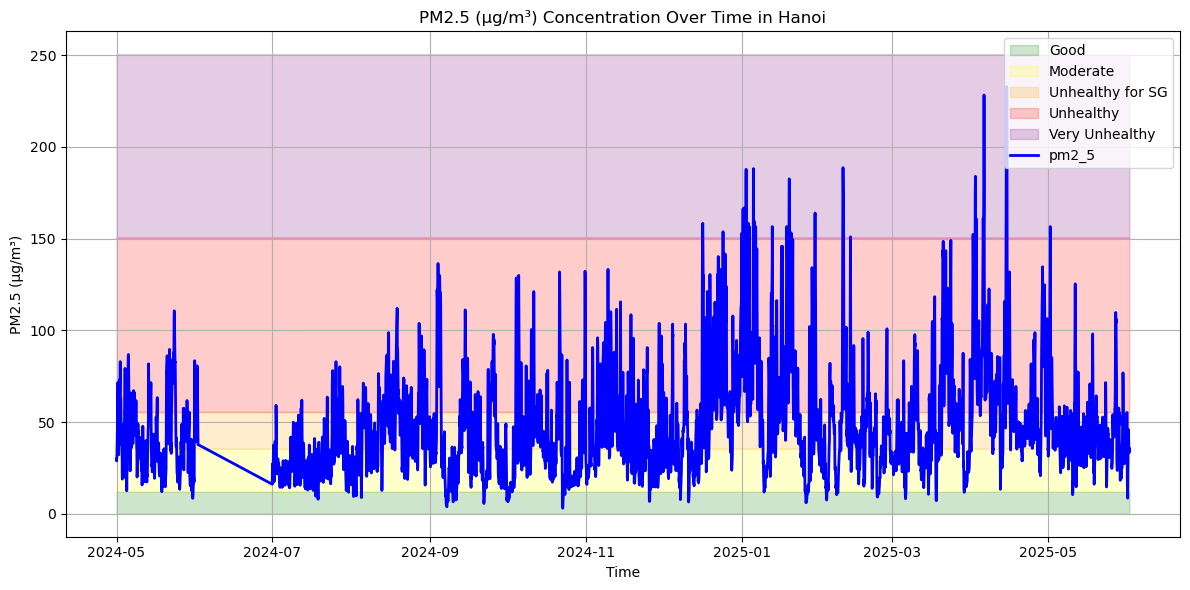

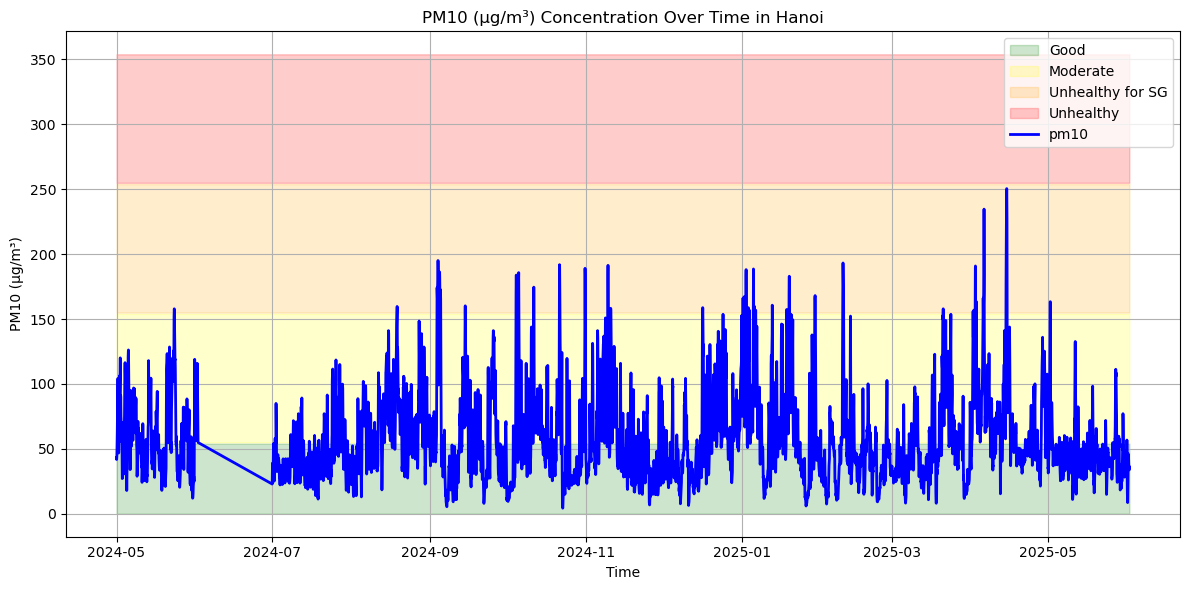

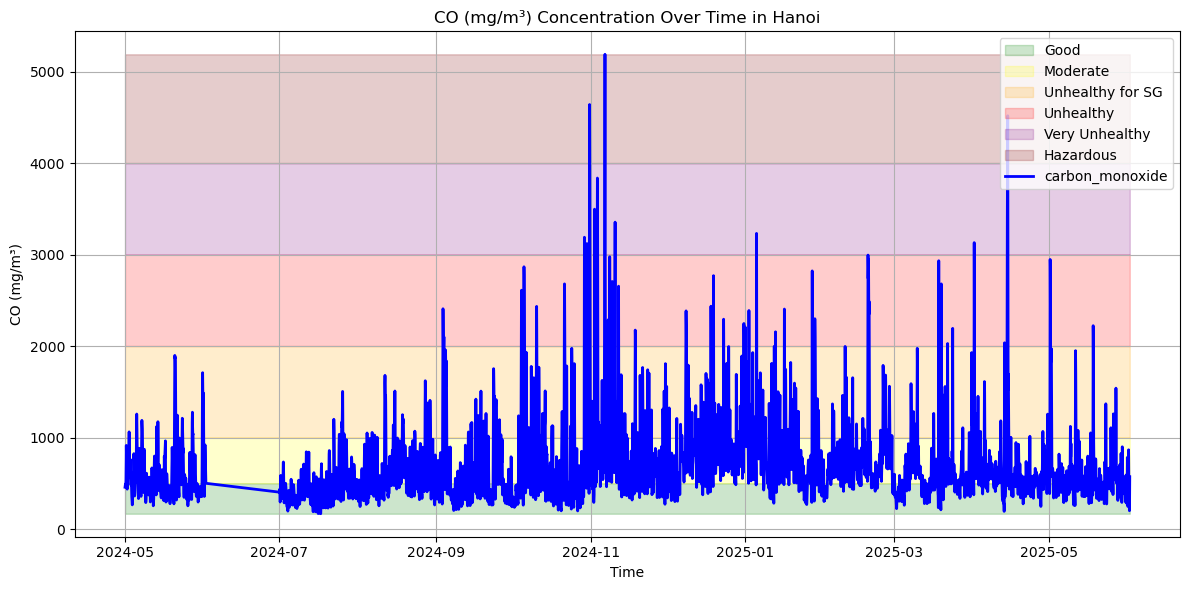

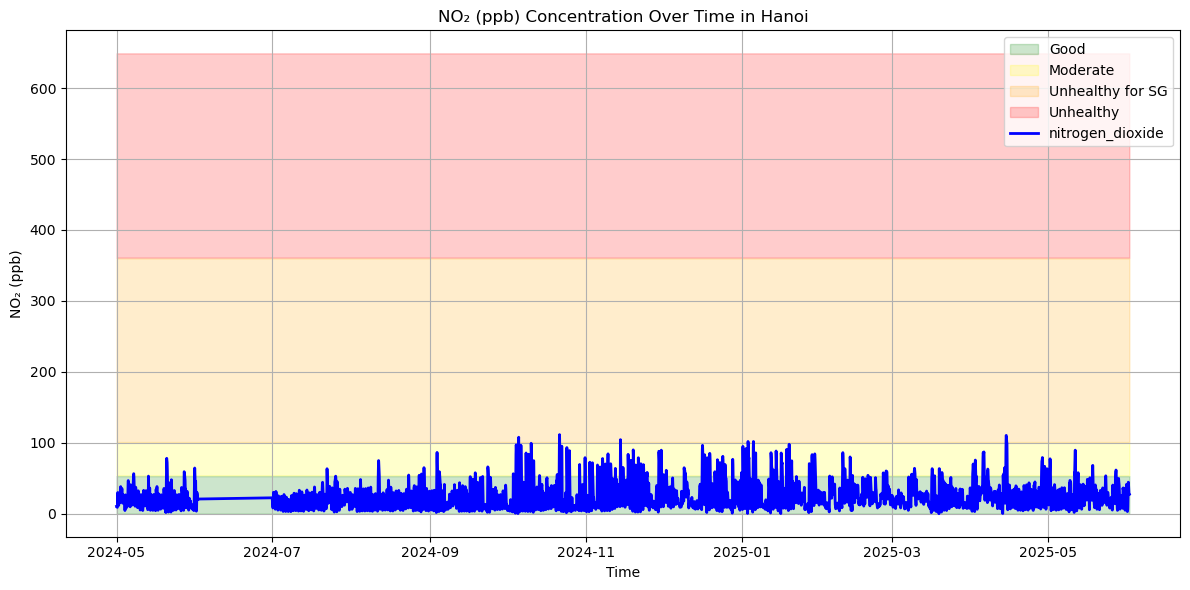

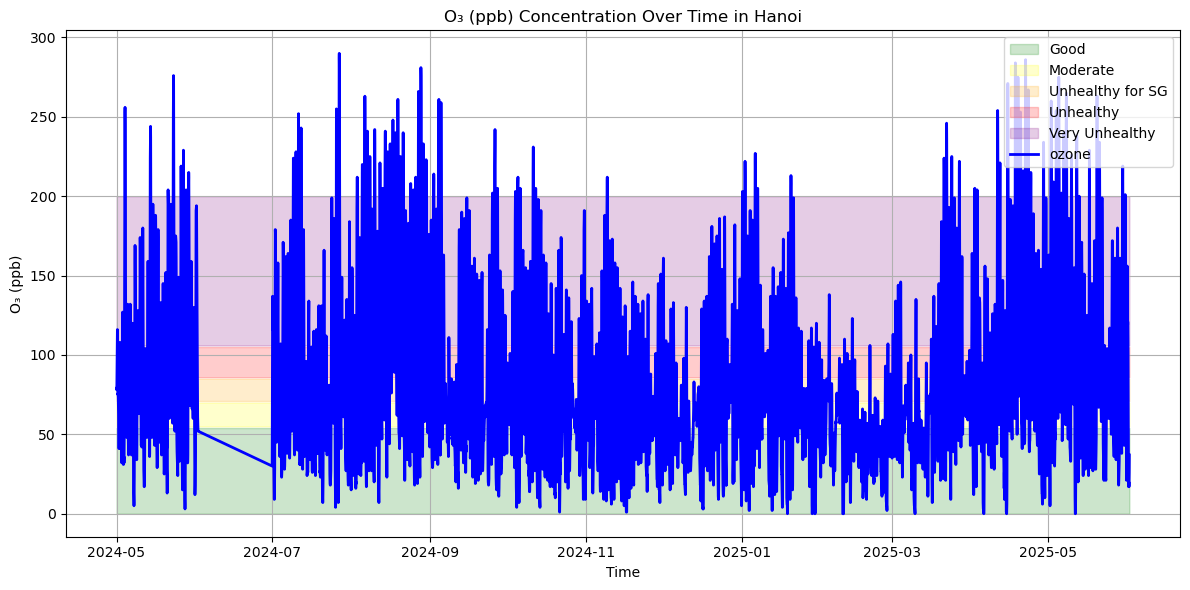

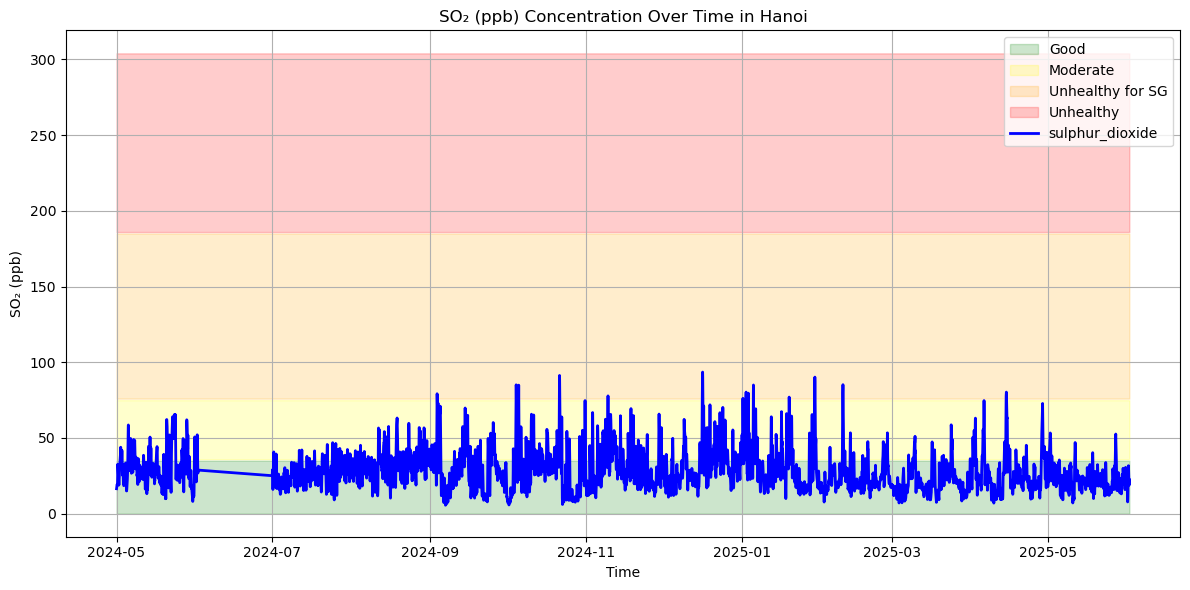

In [7]:
pollutants = {
    "pm2_5": {
        "label": "PM2.5 (µg/m³)",
        "levels": {
            "Good": (0, 12, 'green'),
            "Moderate": (12.1, 35.4, 'yellow'),
            "Unhealthy for SG": (35.5, 55.4, 'orange'),
            "Unhealthy": (55.5, 150.4, 'red'),
            "Very Unhealthy": (150.5, 250.4, 'purple')
        }
    },
    "pm10": {
        "label": "PM10 (µg/m³)",
        "levels": {
            "Good": (0, 54, 'green'),
            "Moderate": (55, 154, 'yellow'),
            "Unhealthy for SG": (155, 254, 'orange'),
            "Unhealthy": (255, 354, 'red')
        }
    },
    "carbon_monoxide": {
        "label": "CO (mg/m³)",
        "levels": {
            "Good": (167, 500, 'green'),
            "Moderate": (501, 1000, 'yellow'),
            "Unhealthy for SG": (1001, 2000, 'orange'),
            "Unhealthy": (2001, 3000, 'red'),
            "Very Unhealthy": (3001, 4000, 'purple'),
            "Hazardous": (4001, 5190, 'maroon')
        }
    },
    "nitrogen_dioxide": {
        "label": "NO₂ (ppb)",
        "levels": {
            "Good": (0, 53, 'green'),
            "Moderate": (54, 100, 'yellow'),
            "Unhealthy for SG": (101, 360, 'orange'),
            "Unhealthy": (361, 649, 'red')
        }
    },
    "ozone": {
        "label": "O₃ (ppb)",
        "levels": {
            "Good": (0, 54, 'green'),
            "Moderate": (55, 70, 'yellow'),
            "Unhealthy for SG": (71, 85, 'orange'),
            "Unhealthy": (86, 105, 'red'),
            "Very Unhealthy": (106, 200, 'purple')
        }
    },
    "sulphur_dioxide": {
        "label": "SO₂ (ppb)",
        "levels": {
            "Good": (0, 35, 'green'),
            "Moderate": (36, 75, 'yellow'),
            "Unhealthy for SG": (76, 185, 'orange'),
            "Unhealthy": (186, 304, 'red')
        }
    }
}

for pollutant, info in pollutants.items():
    plt.figure(figsize=(12,6))
    # Vẽ các vùng mức ảnh hưởng
    for label, (low, high, color) in info["levels"].items():
        plt.fill_between(df["time"], low, high, color=color, alpha=0.2, label=label)
    
    # Vẽ đường nồng độ thực tế
    plt.plot(df["time"], df[pollutant], color='blue', linewidth=2, label=pollutant)
    
    plt.title(f"{info['label']} Concentration Over Time in Hanoi")
    plt.xlabel("Time")
    plt.ylabel(info['label'])
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
# Chuyển cột 'time' sang datetime và set làm index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Thêm cột month và year từ index
df['month'] = df.index.month
df['year'] = df.index.year



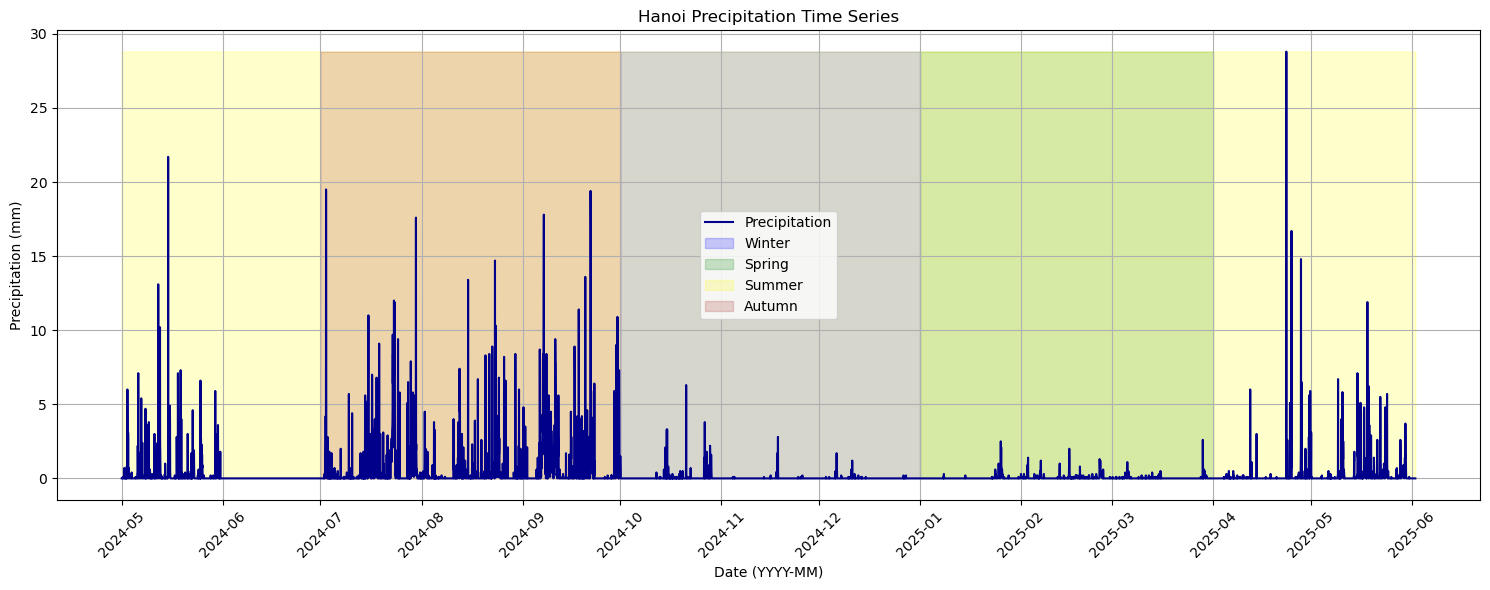

Annual Precipitation (mm) per year:
time
2024-12-31    1927.8
2025-12-31     519.4
Freq: YE-DEC, Name: precipitation, dtype: float64


In [9]:

# Min/max precipitation để vẽ shading mùa
precip_min = df['precipitation'].min()
precip_max = df['precipitation'].max()

# Định nghĩa các mùa (meteorological)
winter_months = [10,11,12]
spring_months = [1, 2, 3]
summer_months = [4, 5, 6]
autumn_months = [7, 8, 9]

plt.figure(figsize=(15, 6))

# Vẽ line precipitation
plt.plot(df.index, df['precipitation'], color='darkblue', label='Precipitation')

# Shading các mùa dựa trên cột 'month'
plt.fill_between(df.index[df['month'].isin(winter_months)], precip_min, precip_max,
                 color='blue', alpha=0.2, label='Winter')
plt.fill_between(df.index[df['month'].isin(spring_months)], precip_min, precip_max,
                 color='green', alpha=0.2, label='Spring')
plt.fill_between(df.index[df['month'].isin(summer_months)], precip_min, precip_max,
                 color='yellow', alpha=0.2, label='Summer')
plt.fill_between(df.index[df['month'].isin(autumn_months)], precip_min, precip_max,
                 color='brown', alpha=0.2, label='Autumn')

# Format trục x để hiển thị tháng/năm rõ ràng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # Tick mỗi tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # YYYY-MM
plt.xticks(rotation=45)  # Xoay nhãn để dễ đọc

# Labels, title, grid, legend
plt.title('Hanoi Precipitation Time Series')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tổng precipitation theo năm
annual_total_precipitation = df['precipitation'].resample('YE').sum()
print("Annual Precipitation (mm) per year:")
print(annual_total_precipitation)

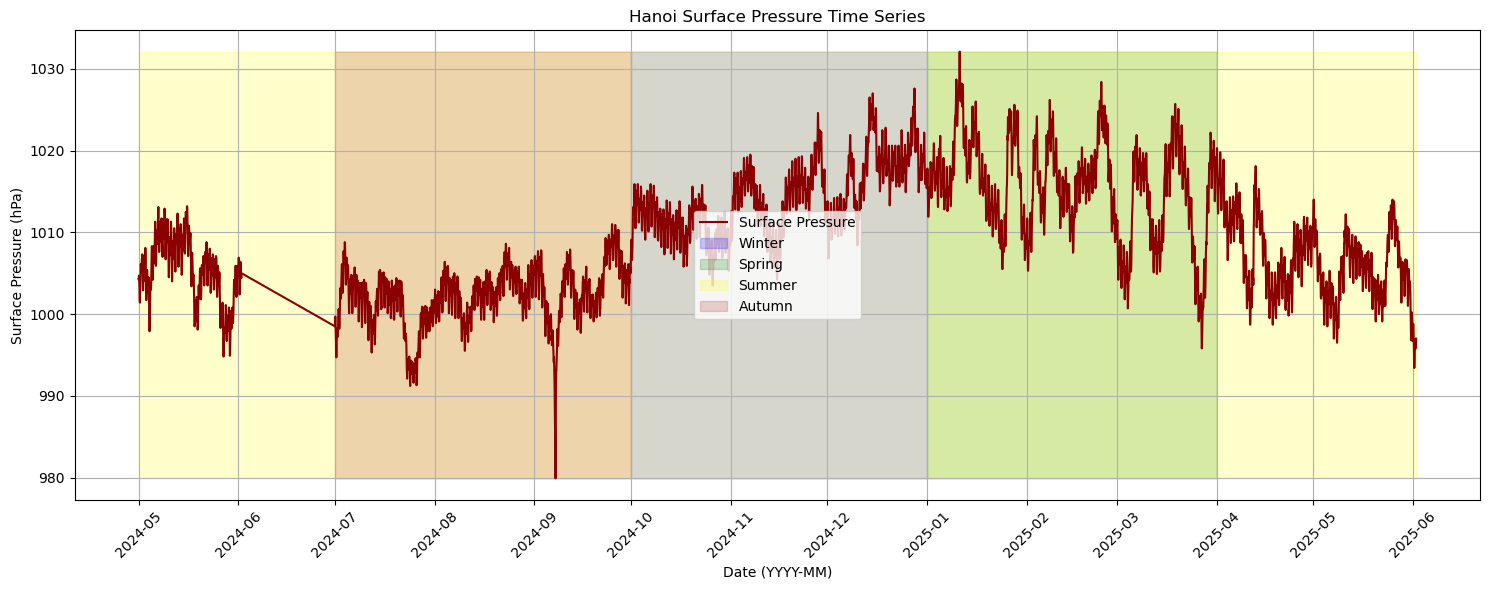

Annual Average Surface Pressure (hPa) per year:
time
2024    1007.699603
2025    1011.769286
Name: surface_pressure, dtype: float64


In [10]:
pressure_min = df['surface_pressure'].min()
pressure_max = df['surface_pressure'].max()

# Mùa (giữ nguyên từ dữ liệu trước)
winter_months = [10,11,12]
spring_months = [1, 2, 3]
summer_months = [4, 5, 6]
autumn_months = [7, 8, 9]

plt.figure(figsize=(15, 6))

# Vẽ line áp suất
plt.plot(df.index, df['surface_pressure'], color='darkred', label='Surface Pressure')

# Shading mùa dựa trên cột month
plt.fill_between(df.index[df['month'].isin(winter_months)], pressure_min, pressure_max,
                 color='blue', alpha=0.2, label='Winter')
plt.fill_between(df.index[df['month'].isin(spring_months)], pressure_min, pressure_max,
                 color='green', alpha=0.2, label='Spring')
plt.fill_between(df.index[df['month'].isin(summer_months)], pressure_min, pressure_max,
                 color='yellow', alpha=0.2, label='Summer')
plt.fill_between(df.index[df['month'].isin(autumn_months)], pressure_min, pressure_max,
                 color='brown', alpha=0.2, label='Autumn')

# Format trục x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Labels, title, grid, legend
plt.title('Hanoi Surface Pressure Time Series')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Surface Pressure (hPa)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Trung bình áp suất theo năm
annual_avg_pressure = df['surface_pressure'].resample('YE').mean()
annual_avg_pressure.index = annual_avg_pressure.index.year  # đổi index thành năm
print("Annual Average Surface Pressure (hPa) per year:")
print(annual_avg_pressure)

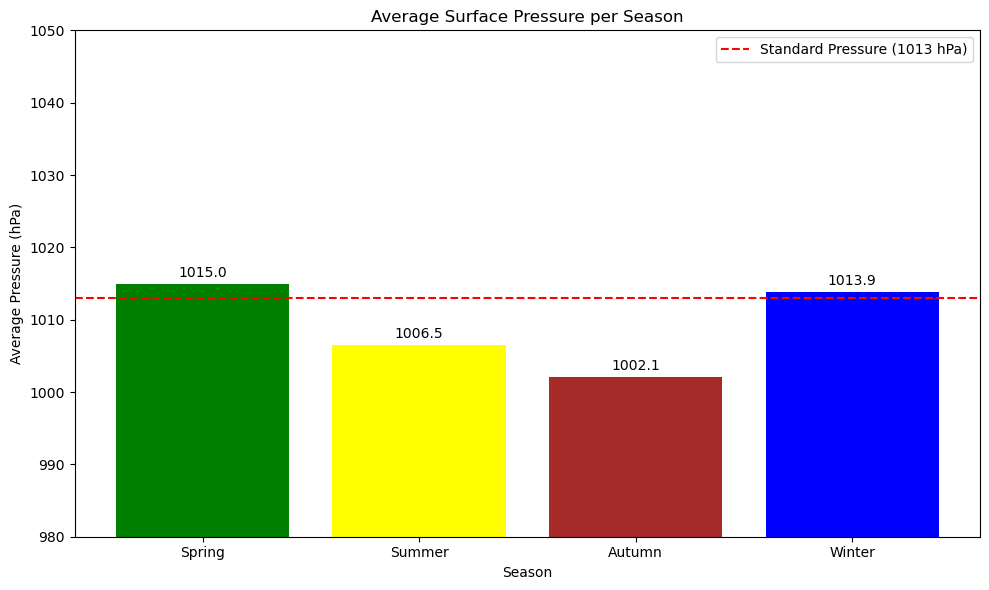

In [11]:
seasons = {
    'Spring': [1, 2, 3],
    'Summer': [4, 5, 6],
    'Autumn': [7, 8, 9],
    'Winter': [10, 11, 12]
}
# Tính trung bình áp suất theo mùa
seasonal_pressure = {}
for season, months in seasons.items():
    seasonal_pressure[season] = df.loc[df.index.month.isin(months), 'surface_pressure'].mean()

# Vẽ bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_pressure.keys(), seasonal_pressure.values(),
               color=['green', 'yellow', 'brown', 'blue'])  # màu theo mùa

# Thêm đường chuẩn áp suất (1013 hPa)
plt.axhline(y=1013, color='red', linestyle='--', label='Standard Pressure (1013 hPa)')

# Labels, title, y-axis
plt.title('Average Surface Pressure per Season')
plt.xlabel('Season')
plt.ylabel('Average Pressure (hPa)')
plt.ylim(980, 1050)  # Điều chỉnh giới hạn trục y cho áp suất

# Hiển thị giá trị trên đầu từng bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}',
             ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

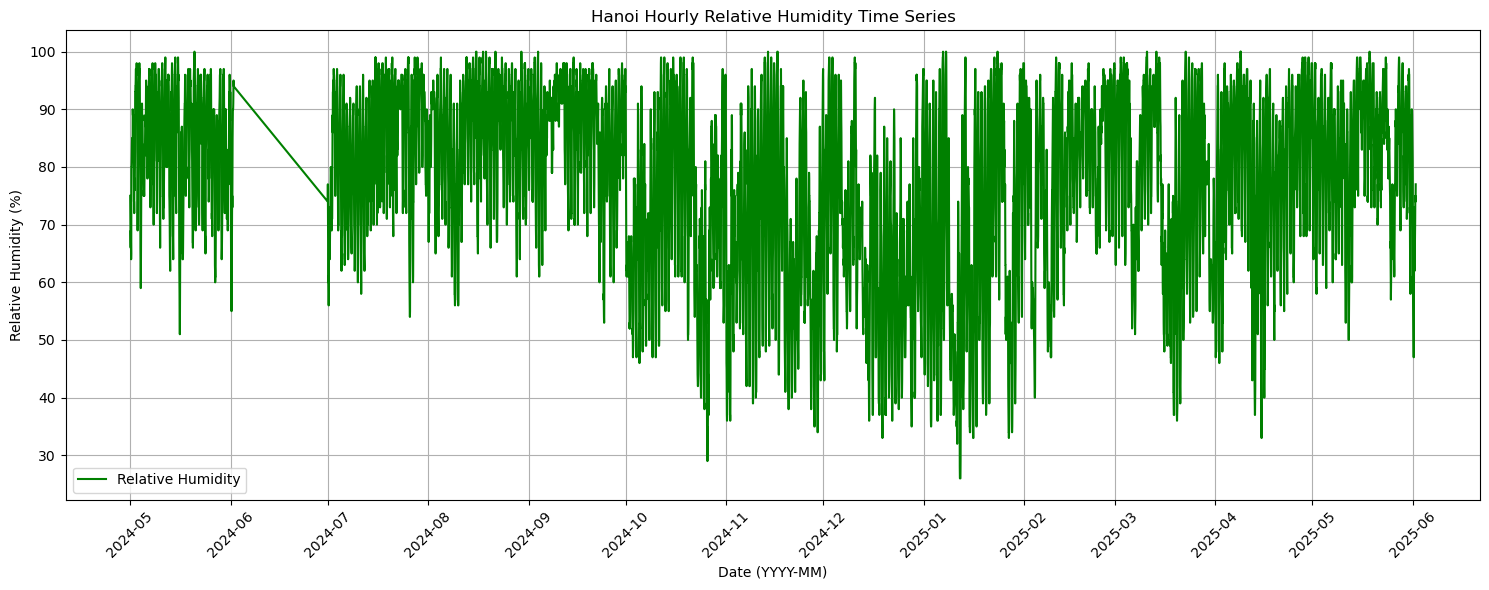

Average Annual Relative Humidity: 77.26 %


In [12]:
plt.figure(figsize=(15, 6))

# Vẽ line plot Relative Humidity
plt.plot(df.index, df['relative_humidity_2m'], color='green', label='Relative Humidity')

# Format trục x để hiển thị tháng/năm rõ ràng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # Tick mỗi tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # YYYY-MM
plt.xticks(rotation=45)

# Labels, title, grid, legend
plt.title('Hanoi Hourly Relative Humidity Time Series')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tính giá trị trung bình Relative Humidity
average_annual_rh = df['relative_humidity_2m'].mean()
print("Average Annual Relative Humidity:", round(average_annual_rh, 2), '%')

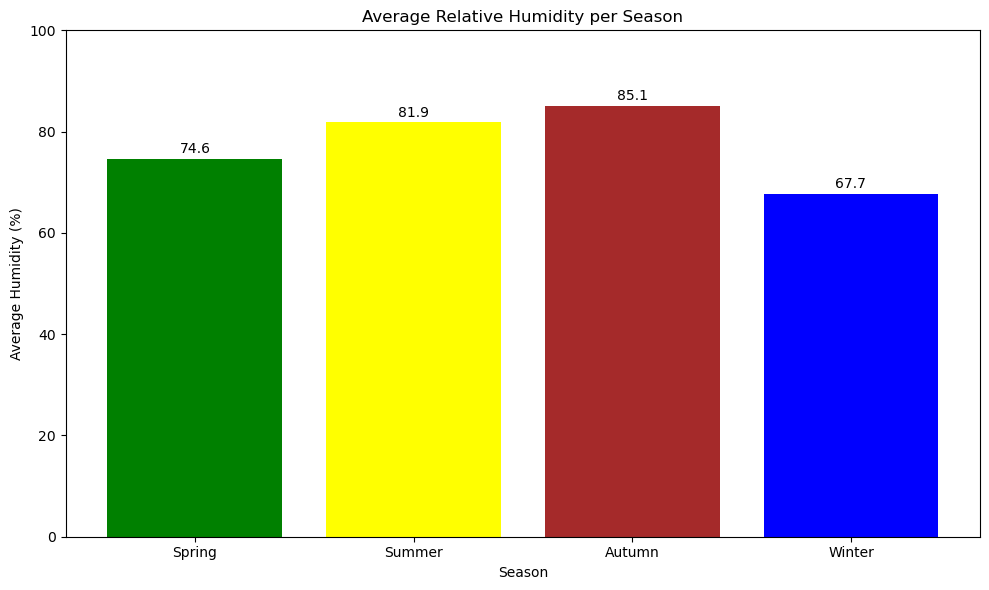

In [13]:
seasons = {
    'Spring': [1, 2, 3],
    'Summer': [4, 5, 6],
    'Autumn': [7, 8, 9],
    'Winter': [10, 11, 12]
}
seasonal_humid = {}
for season, months in seasons.items():
    seasonal_humid[season] = df.loc[df.index.month.isin(months), 'relative_humidity_2m'].mean()

# Vẽ bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_humid.keys(), seasonal_humid.values(),
               color=['green', 'yellow', 'brown', 'blue'])  # màu theo mùa

# Labels, title, y-axis
plt.title('Average Relative Humidity per Season')
plt.xlabel('Season')
plt.ylabel('Average Humidity (%)')
plt.ylim(0, 100)  # Humidity % từ 0-100

# Hiển thị giá trị trên đầu từng bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

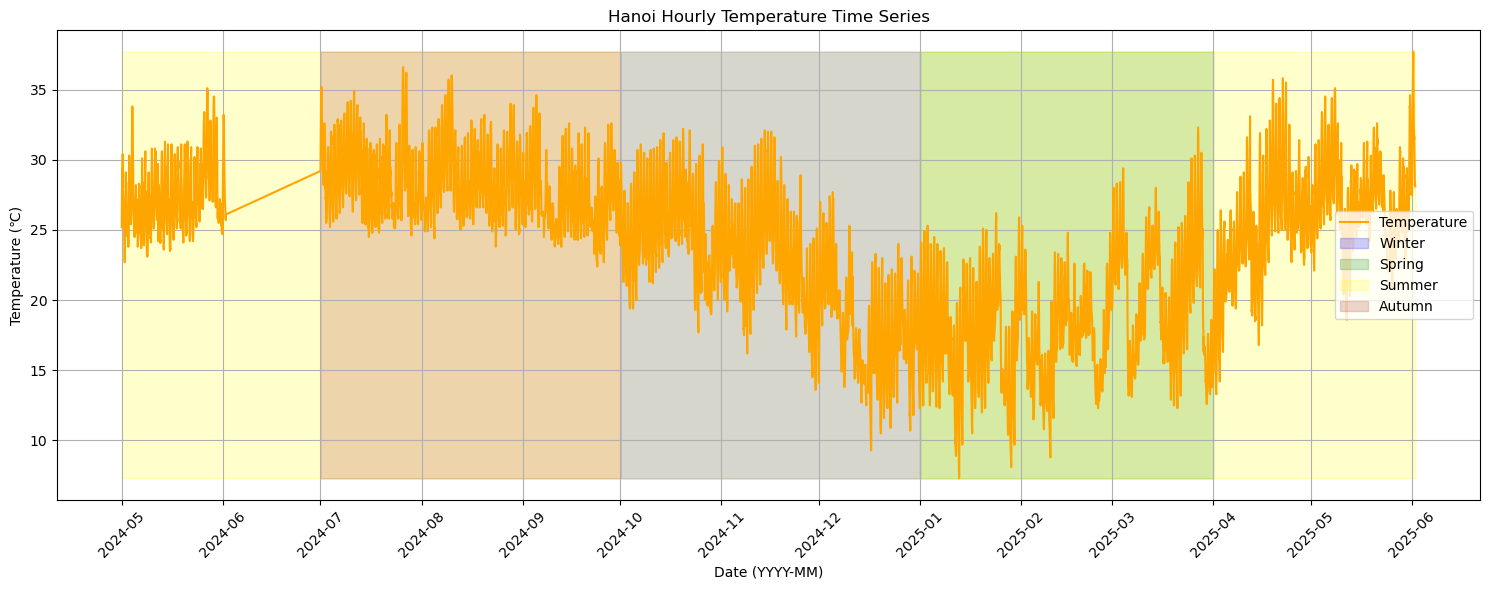

Average Annual Temperature: 23.83 ℃


In [14]:
winter_months = [10,11,12]
spring_months = [1, 2, 3]
summer_months = [4, 5, 6]
autumn_months = [7, 8, 9]
temp_min = df['temperature_2m'].min()
temp_max = df['temperature_2m'].max()

plt.figure(figsize=(15, 6))

# Vẽ line plot Temperature
plt.plot(df.index, df['temperature_2m'], color='orange', label='Temperature')

# Shading mùa dựa trên cột month
plt.fill_between(df.index[df.index.month.isin(winter_months)], temp_min, temp_max, 
                 color='blue', alpha=0.2, label='Winter')
plt.fill_between(df.index[df.index.month.isin(spring_months)], temp_min, temp_max, 
                 color='green', alpha=0.2, label='Spring')
plt.fill_between(df.index[df.index.month.isin(summer_months)], temp_min, temp_max, 
                 color='yellow', alpha=0.2, label='Summer')
plt.fill_between(df.index[df.index.month.isin(autumn_months)], temp_min, temp_max, 
                 color='brown', alpha=0.2, label='Autumn')

# Format trục x để hiển thị tháng/năm rõ ràng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Labels, title, grid, legend
plt.title('Hanoi Hourly Temperature Time Series')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Temperature (℃)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tính giá trị trung bình hàng năm
average_annual_temperature = df['temperature_2m'].mean()
print("Average Annual Temperature:", round(average_annual_temperature, 2), "℃")

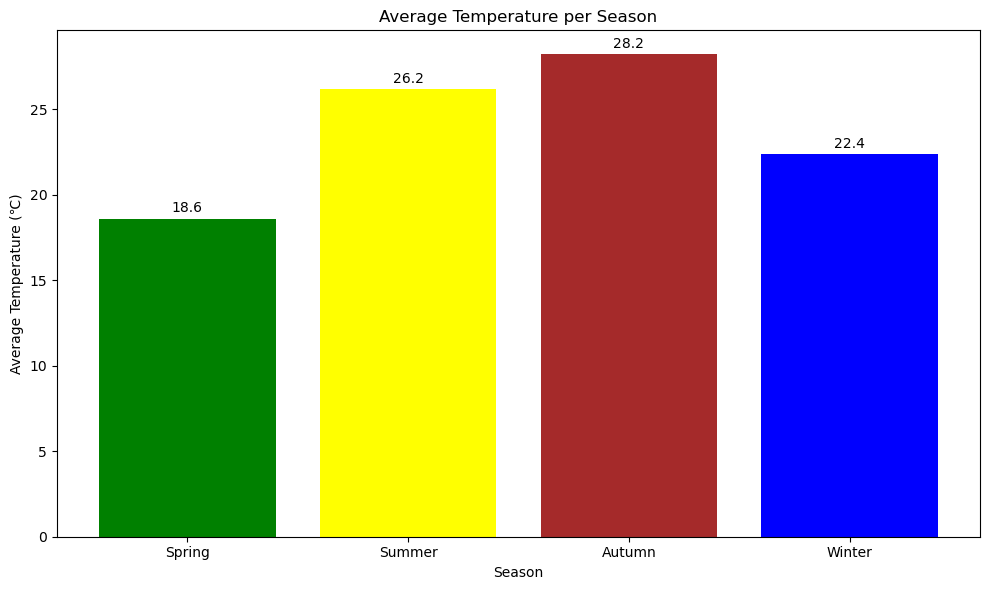

In [15]:
seasons = {
    'Spring': [1, 2, 3],
    'Summer': [4, 5, 6],
    'Autumn': [7, 8, 9],
    'Winter': [10, 11, 12]
}
seasonal_temp = {}
for season, months in seasons.items():
    seasonal_temp[season] = df.loc[df.index.month.isin(months), 'temperature_2m'].mean()

# Vẽ bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_temp.keys(), seasonal_temp.values(),
               color=['green', 'yellow', 'brown', 'blue'])  # màu theo mùa

# Labels, title
plt.title('Average Temperature per Season')
plt.xlabel('Season')
plt.ylabel('Average Temperature (℃)')

# Hiển thị giá trị trên đầu từng bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

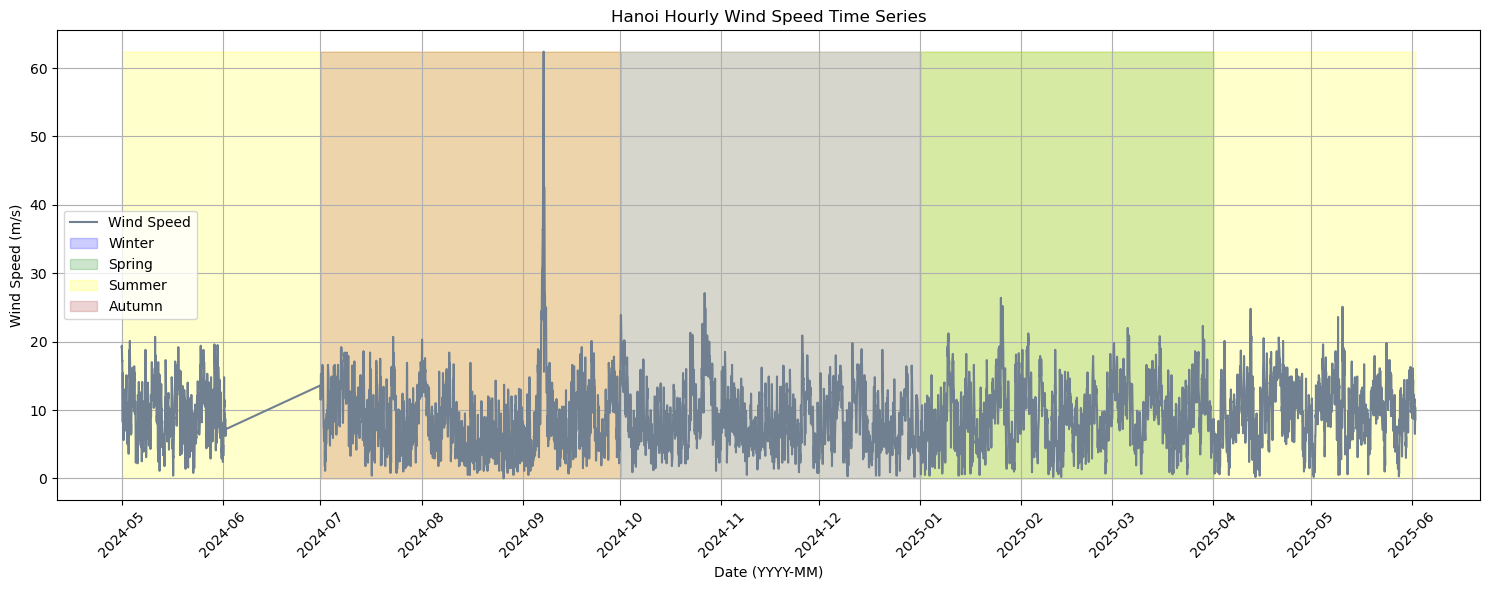

Average Annual Wind Speed: 9.16 m/s


In [16]:
winter_months = [10,11,12]
spring_months = [1, 2, 3]
summer_months = [4, 5, 6]
autumn_months = [7, 8, 9]

wind_min = df['windspeed_10m'].min()
wind_max = df['windspeed_10m'].max()

plt.figure(figsize=(15, 6))

# Vẽ line plot Wind Speed
plt.plot(df.index, df['windspeed_10m'], color='slategray', label='Wind Speed')

# Shading mùa dựa trên cột month
plt.fill_between(df.index[df.index.month.isin(winter_months)], wind_min, wind_max, 
                 color='blue', alpha=0.2, label='Winter')
plt.fill_between(df.index[df.index.month.isin(spring_months)], wind_min, wind_max, 
                 color='green', alpha=0.2, label='Spring')
plt.fill_between(df.index[df.index.month.isin(summer_months)], wind_min, wind_max, 
                 color='yellow', alpha=0.2, label='Summer')
plt.fill_between(df.index[df.index.month.isin(autumn_months)], wind_min, wind_max, 
                 color='brown', alpha=0.2, label='Autumn')

# Format trục x để hiển thị tháng/năm rõ ràng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Labels, title, grid, legend
plt.title('Hanoi Hourly Wind Speed Time Series')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tính giá trị trung bình Wind Speed hàng năm
average_annual_wind_speed = df['windspeed_10m'].mean()
print("Average Annual Wind Speed:", round(average_annual_wind_speed, 2), "m/s")

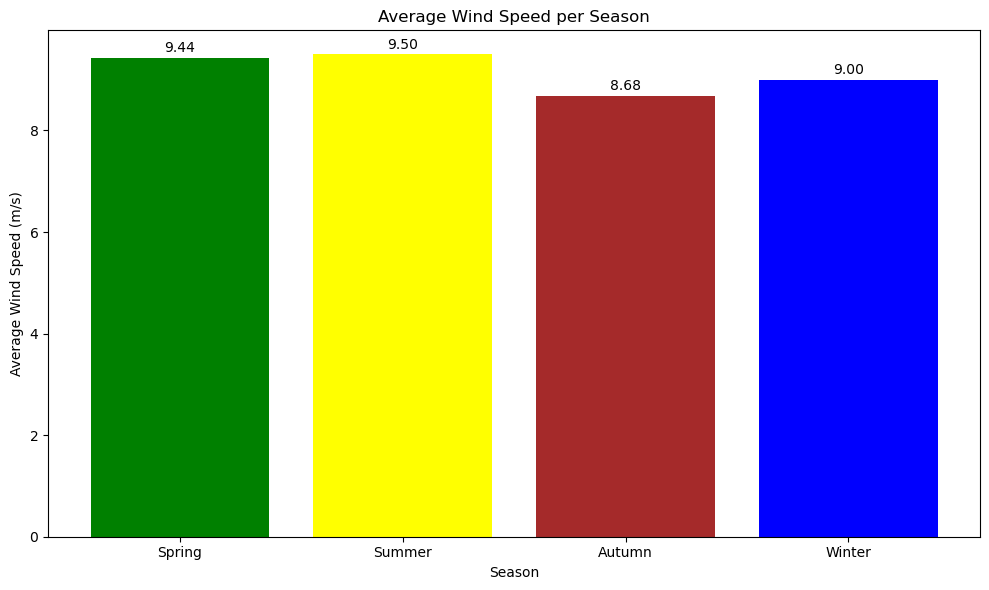

In [17]:
seasons = {
    'Spring': [1, 2, 3],
    'Summer': [4, 5, 6],
    'Autumn': [7, 8, 9],
    'Winter': [10, 11, 12]
}
seasonal_wind_speed = {}
for season, months in seasons.items():
    seasonal_wind_speed[season] = df.loc[df.index.month.isin(months), 'windspeed_10m'].mean()

# Vẽ bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_wind_speed.keys(), seasonal_wind_speed.values(),
               color=['green', 'yellow', 'brown', 'blue'])  # màu theo mùa

# Labels, title
plt.title('Average Wind Speed per Season')
plt.xlabel('Season')
plt.ylabel('Average Wind Speed (m/s)')

# Hiển thị giá trị trên đầu từng bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

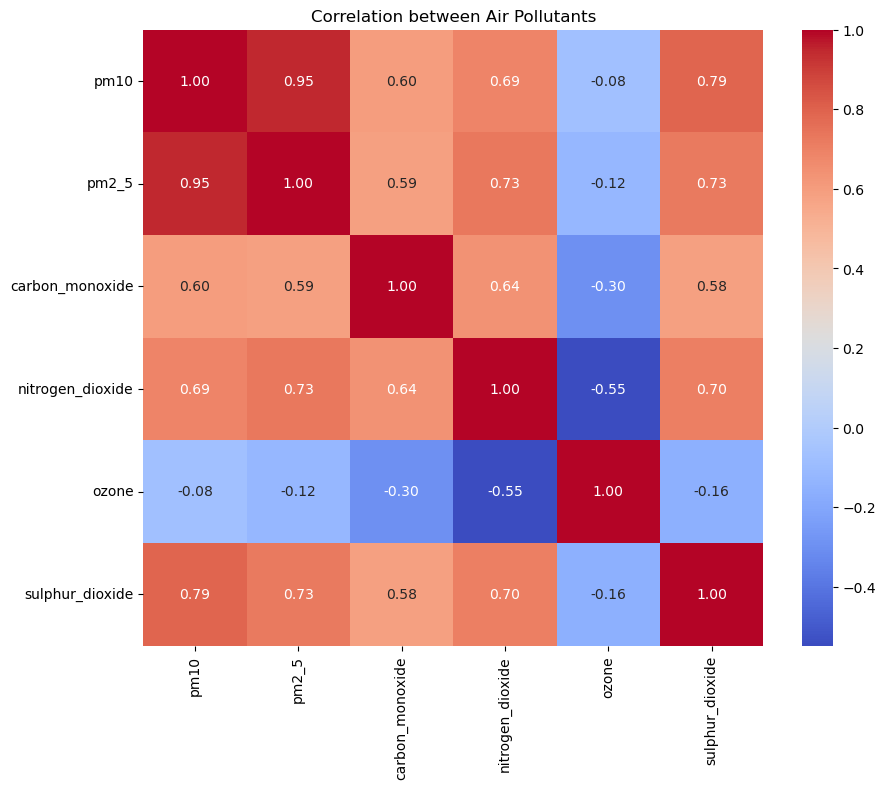

In [18]:
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']

# Tính ma trận tương quan
corr_matrix = df[pollutants].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Air Pollutants')
plt.show()